# **EDA EXPLORATORY_DATA_ANALYSIS**

## 1. Introducción

En este Notebook se realizará el Análisis Exploratorio de los Datos de los tres conjuntos de datos limpios. Esto se hace dado que es un gran volumen de información, el procesamiento, almacenamiento y el deploy del proyecto, ya que son limitados.

## 2. Importación de Librerías

In [2]:
import pandas as pd # Cargamos la libreria de "pandas" para la manipulación y el análisis de datos
import numpy as np # Cargamos la librería de "numpy" para realizar cálculos lógicos y matemáticos sobre cuadros y matrices en el caso que lo necesitemos
import matplotlib.pyplot as plt  #Cargarmos la libreria de "matplotlib" para graficar la relación que existen entre variables
import seaborn as sns  #Cargarmos la libreria de "seaborn" para graficar la relacion que existen entre las variables
import warnings
warnings.filterwarnings("ignore")


## 3. EDA - Analisis Exploratorio de Datos

## 3.1. Carga de DataSet

In [3]:
#Establecemos las rutas de los archivos
ruta_steam_games_parquet = r'Dataset_Clean\steam_games_clean.parquet'
ruta_user_reviews_parquet = r'Dataset_Clean\australian_user_reviews_clean.parquet'
ruta_user_items_parquet = r'Dataset_Clean\australian_user_items_clean.parquet'

#Cargamos los archivos limpios luego de hacer el ETL
df_steam_games = pd.read_parquet(ruta_steam_games_parquet) #Cargamos el archivo steam_games_clean
df_user_reviews = pd.read_parquet(ruta_user_reviews_parquet) #Cargamos el archivo australian_user_reviews
df_user_items = pd.read_parquet(ruta_user_items_parquet) #Cargamos el archivo australian_user_items

print(f'Se han leido exitosamente los siguientes archivos parquet')

Se han leido exitosamente los siguientes archivos parquet


### 3.2. Analisís Descriptivo de los DataSet

#### 3.2.1. Definición de las Funciones Descriptivas de los DataSet

In [4]:
#Definimos algunas funciones para que nos facilita la descripcion de las principales caracteristicas del DataFrame
def caracteristicas_df(df):
    """
    Describe de forma general la base de datos .

    Esta función simplemente muestra el tamaño, información general y
    la cantidad de datos nulos.

    Parametros
    ----------
    df (pandas.DataFrame): El DataFrame que se va a analizar.

    Returns:
    ----------
        - 'df.shape': Numero de filas y columnas
        - 'df.info': Muestra información general del DataFrame

    """
    print('*'*10 + '|'*10 + 'FORMA DE BASE DE DATOS' + '|'*10 + '*'*10, end = '\n'*2)
    print(f'Tiene {df.shape[0]} filas y {df.shape[1]} columnas o variables')
    print(end = '\n'*2)

    print('*'*10 + '|'*10 + 'INFORMACION GENERAL DE LA BASE DE DATOS' + '|'*10 + '*'*10, end = '\n'*2)
    print(df.info(), end = '\n'*2)

def valores_nulos_df(df):
    """
    Revisa presencia de valores nulos en un DataFrame.
    Esta función toma un DataFrame como entrada y devuelve un resumen que incluye información sobre
    el porcentaje de valores no nulos y nulos, así como la ncantidad de valores nulos por columna.

    Parametros:
    ----------
    df (pandas.DataFrame): El DataFrame que se va a analizar.

    Returns:
    ----------
        pandas.DataFrame: Un DataFrame que contiene el resumen de cada columna, incluyendo:
        - 'nombre': Nombre de cada columna.
        - 'no_nulos_%': Porcentaje de valores no nulos en cada columna.
        - 'nulos_%': Porcentaje de valores nulos en cada columna.
        - 'nulos': Cantidad de valores nulos en cada columna.

    """
    mi_df = {"nombre": [], "tipo_datos": [], "nulos_%": [], "nulos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_df["nombre"].append(columna)
        mi_df["tipo_datos"].append(df[columna].apply(type).unique())
        mi_df["nulos_%"].append(round(100-porcentaje_no_nulos, 2))
        mi_df["nulos"].append(df[columna].isnull().sum())

    df_nulos = pd.DataFrame(mi_df)

    return df_nulos

def cant_porcentaje(df, columna):

    """
    Cuanta la cantidad de True/False luego calcula el porcentaje.

    Parameters:
    ----------
    - df (DataFrame): El DataFrame que contiene los datos.
    - columna (str): El nombre de la columna en el DataFrame para la cual se desea generar el resumen.

    Returns:
    ----------
    DataFrame: Un DataFrame que resume la cantidad y el porcentaje de True/False en la columna especificada.

    """
    # Cuenta la cantidad de True/False luego calcula el porcentaje
    counts = df[columna].value_counts()
    percentages = round(100 * counts / len(df),2)
    # Crea un dataframe con el resumen
    df_results = pd.DataFrame({
        "Cantidad": counts,
        "Porcentaje_%": percentages
    })
    return df_results

#### 3.2.2. Descripción de los DataSet

In [5]:
#Llamamos a la función creada para visualizar las caracteristicas generales del DataSet "STEAM-GAMES"
caracteristicas_df(df_steam_games)

**********||||||||||FORMA DE BASE DE DATOS||||||||||**********

Tiene 71549 filas y 7 columnas o variables


**********||||||||||INFORMACION GENERAL DE LA BASE DE DATOS||||||||||**********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71549 entries, 0 to 71548
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        71549 non-null  object 
 1   app_name      71549 non-null  object 
 2   release_date  71549 non-null  object 
 3   price         71549 non-null  float64
 4   early_access  71549 non-null  bool   
 5   id            71549 non-null  int64  
 6   developer     71549 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 3.3+ MB
None



In [6]:
#Llamamos a la función creada para visualizar las caracteristicas generales del DataSet "STEAM-GAMES"
valores_nulos_df(df_steam_games)

,nombre,tipo_datos,nulos_%,nulos
0,genres,[<class 'str'>],0.0,0
1,app_name,[<class 'str'>],0.0,0
2,release_date,[<class 'str'>],0.0,0
3,price,[<class 'float'>],0.0,0
4,early_access,[<class 'bool'>],0.0,0
5,id,[<class 'int'>],0.0,0
6,developer,[<class 'str'>],0.0,0


In [7]:
#Llamamos a la función creada para visualizar las caracteristicas generales del DataSet "USER-REVIEWS"
caracteristicas_df(df_user_reviews)

**********||||||||||FORMA DE BASE DE DATOS||||||||||**********

Tiene 53902 filas y 10 columnas o variables


**********||||||||||INFORMACION GENERAL DE LA BASE DE DATOS||||||||||**********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user_id               53902 non-null  object
 1   user_url              53902 non-null  object
 2   item_id               53902 non-null  int64 
 3   recommend             53902 non-null  int64 
 4   review                53902 non-null  object
 5   Posted Date           53902 non-null  object
 6   Date last edited      53902 non-null  object
 7   funny review votes    53902 non-null  int64 
 8   Helpful review votes  53902 non-null  int64 
 9   total review votes    53902 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 4.1+ MB
None



In [8]:
#Llamamos a la función creada para visualizar las caracteristicas generales del DataSet "STEAM-GAMES"
valores_nulos_df(df_user_reviews)

,nombre,tipo_datos,nulos_%,nulos
0,user_id,[<class 'str'>],0.0,0
1,user_url,[<class 'str'>],0.0,0
2,item_id,[<class 'int'>],0.0,0
3,recommend,[<class 'int'>],0.0,0
4,review,[<class 'str'>],0.0,0
5,Posted Date,[<class 'str'>],0.0,0
6,Date last edited,[<class 'str'>],0.0,0
7,funny review votes,[<class 'int'>],0.0,0
8,Helpful review votes,[<class 'int'>],0.0,0
9,total review votes,[<class 'int'>],0.0,0


In [9]:
#Llamamos a la función creada para visualizar las caracteristicas generales del DataSet "USER-REVIEWS"
caracteristicas_df(df_user_items)

**********||||||||||FORMA DE BASE DE DATOS||||||||||**********

Tiene 5094105 filas y 8 columnas o variables


**********||||||||||INFORMACION GENERAL DE LA BASE DE DATOS||||||||||**********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int64 
 1   item_name         object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   user_id           object
 5   items_count       int64 
 6   steam_id          int64 
 7   user_url          object
dtypes: int64(5), object(3)
memory usage: 310.9+ MB
None



In [10]:
#Llamamos a la función creada para visualizar las caracteristicas generales del DataSet "STEAM-GAMES"
valores_nulos_df(df_user_items)

,nombre,tipo_datos,nulos_%,nulos
0,item_id,[<class 'int'>],0.0,0
1,item_name,[<class 'str'>],0.0,0
2,playtime_forever,[<class 'int'>],0.0,0
3,playtime_2weeks,[<class 'int'>],0.0,0
4,user_id,[<class 'str'>],0.0,0
5,items_count,[<class 'int'>],0.0,0
6,steam_id,[<class 'int'>],0.0,0
7,user_url,[<class 'str'>],0.0,0


## 3.2. EDA - Steam_Games

**Variables:**

*   **publisher:** Variable de tipo categorico que contiene los nombres de las empresas
que publicaron los juegos.
*   **genres:** Variable de tipo categorico que contiene los generos de los juegos.
*   **price:** Variable de tipo numerica que contiene el precio de los juegos.
*   **early_access:** Variable de tipo categorico que indica si el juego ofrece.early access
*   **year:** Variable de tipo numerica que contiene el año en el que se publico el juego.

A primera vista podemos trabajar en el EDA en 4 grafico:

*   columna genres o genero el cual por el volumen de datos podriamos trabajar con un diagrama de barras.
*   columna price donde podemos trabajarlo tanto como un boxplot y como un histograma.
*   columna early_acces se puede trabajar como un diagrama circular ya que unicamente poseemos 2 valores a convenenica.
*   columna year donde se puede observar la cantidad de juegos creados por año.
*   Otros

















**1. ¿Cual es el género que más juegos tiene en el mercado de Steam?**

In [11]:
#En primer lugar debemos saber cual es la cantidad de de juegos
cantidad_juegos = len(df_steam_games['id'].unique())
print(f'La cantidad de juegos en total es: {cantidad_juegos}')

La cantidad de juegos en total es: 28849


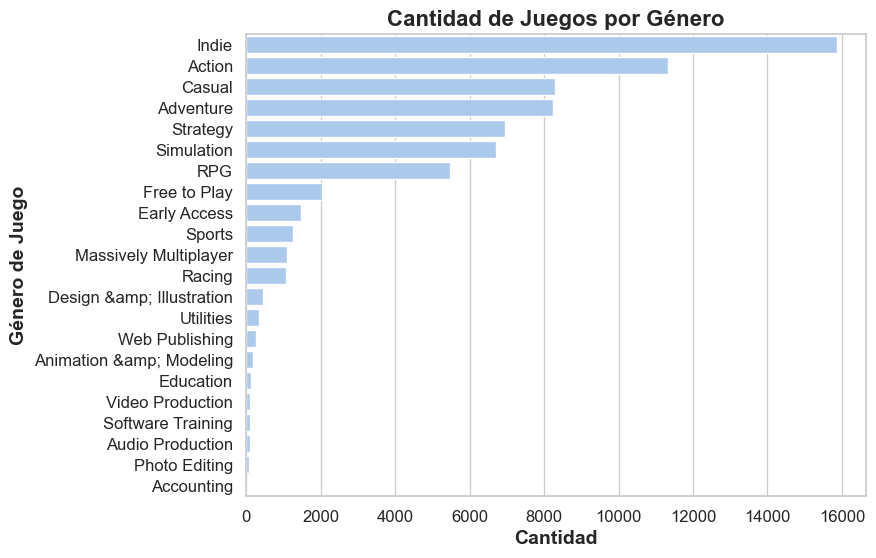

In [12]:
"""Se observa que existen 28849 juegos en total, ahora mostraremos la distribución por genero de la cantidad de juegos """
#Ordenamos el grafico de mayor a menor
df_steam_games_ordenado = df_steam_games.sort_values(by='genres', ascending=False)

#Caracteristicas base de nuestro grafico
sns.set(style="whitegrid")
custom_palette = sns.color_palette("pastel")
sns.set_palette(custom_palette)

# Crear el gráfico
plt.figure(figsize=(8, 6))
plot = sns.countplot(data=df_steam_games_ordenado, y='genres', orient='h', order=df_steam_games_ordenado['genres'].value_counts().index)

# Personalizamos el gráfico
plt.title('Cantidad de Juegos por Género', fontsize=16, weight='bold')
plt.ylabel('Género de Juego', fontsize=14, weight='bold')
plt.xlabel('Cantidad', fontsize=14, weight='bold')

# Aumentar el tamaño de los títulos de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

In [13]:
#Pasamos ver los valores los porcentajes y las cantidad
cant_porcentaje(df_steam_games_ordenado, 'genres')

,Cantidad,Porcentaje_%
genres,,
Indie,15857,22.16
Action,11318,15.82
Casual,8282,11.58
Adventure,8242,11.52
Strategy,6957,9.72
Simulation,6699,9.36
RPG,5479,7.66
Free to Play,2031,2.84
Early Access,1462,2.04


**Conclusión:** Se puede observar que la mayor cantidad de juegos son del género Indie.

**2. ¿En que año se produjo el BOOM de producción en videojuegos?**

In [14]:
# Eliminamos los duplicados en la columna "app_name"
games_per_year = df_steam_games.drop_duplicates(subset=['app_name'])

# Excluimos "dato sin especificar"
games_per_year = games_per_year[games_per_year['app_name'] != 'dato sin especificar']

# Agrupamos por año la columna "app_name" y contamos
games_per_year = games_per_year['app_name'].groupby(games_per_year['release_date']).count()

# Filtrar desde el año 2000 hasta el año 2021
games_per_year = games_per_year[(games_per_year.index >= '2000-01-01') & (games_per_year.index <= '2021-01-01')]

# Establecemos que el índice del gráfico va a ser la fecha de lanzamiento
index = games_per_year.index


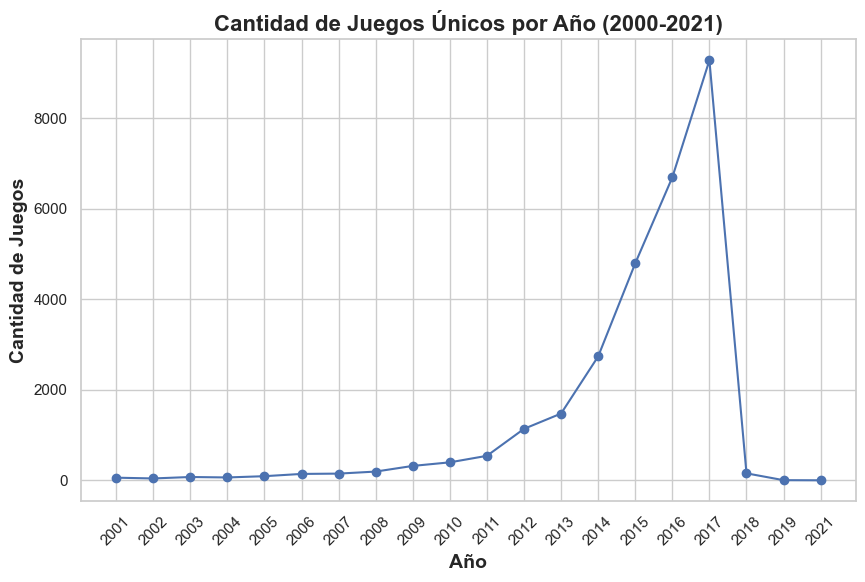

In [15]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(index, games_per_year, marker='o', linestyle='-', color='b')

# Personalizar el gráfico
plt.title('Cantidad de Juegos Únicos por Año (2000-2021)', fontsize=16, weight='bold')
plt.xlabel('Año', fontsize=14, weight='bold')
plt.ylabel('Cantidad de Juegos', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.show()

**Conclusión:** Se puede observar que el periodo del BOOM fue del 2015 al 2017.

**3. ¿Porcentaje de videojuegos que ofrecen pre-lanzamiento?**

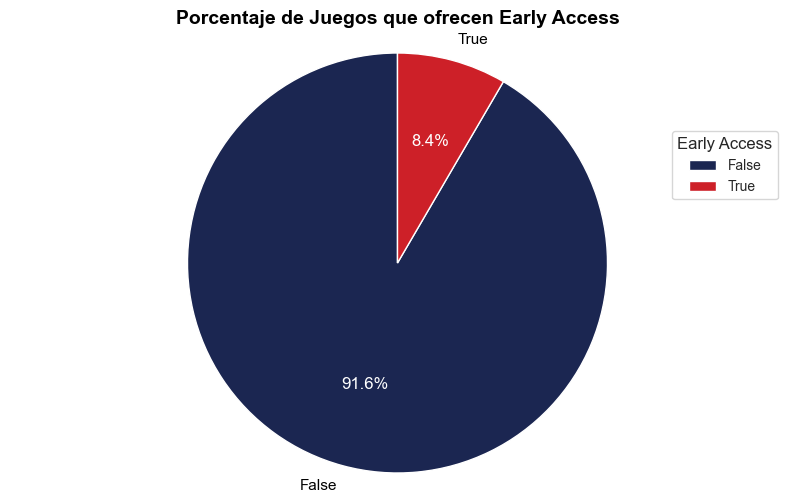

In [16]:
# Agrupamos los valores y ordenar de menor a mayor
sin_prelanzamiento = df_steam_games['early_access'].groupby(df_steam_games['early_access']).count()
con_prelanzamiento = df_steam_games['early_access'].unique()
colores = ["#1b2651", "#cd2028"]
ordenar_sin_prelanzamiento, ordenar_con_prelanzamiento = zip(*sorted(zip(sin_prelanzamiento, con_prelanzamiento), reverse=True))

# Creamos el gráfico de pie
fig, piechart_3 = plt.subplots(figsize=(10, 6))
_, _, autopcts = piechart_3.pie(ordenar_sin_prelanzamiento, labels=ordenar_con_prelanzamiento, autopct='%1.1f%%', colors=colores, startangle=90, textprops={'color': 'black'}, pctdistance=0.6, labeldistance=1.1)

# Cambiamos el color del porcentaje para que sea más legible
for autopct in autopcts:
    autopct.set_color('white')

# Ajustamos el aspecto del gráfico para que el gráfico de pie sea circular y no se deforme
piechart_3.axis('equal')

# Agregamos título
plt.title('Porcentaje de Juegos que ofrecen Early Access', fontsize=14, weight='bold', color='black')

# Agregamos leyenda
plt.legend(labels=ordenar_con_prelanzamiento, loc="upper right", bbox_to_anchor=(1, 0.8), title="Early Access", title_fontsize="12", fontsize="10")

# Mostramos el gráfico
plt.show()

**Conclusión:** Se puede observar que la mayor parte de juegos no tienen prelanzamiento.

**4. ¿Cual es desarrollador con más ventas en Steam?**

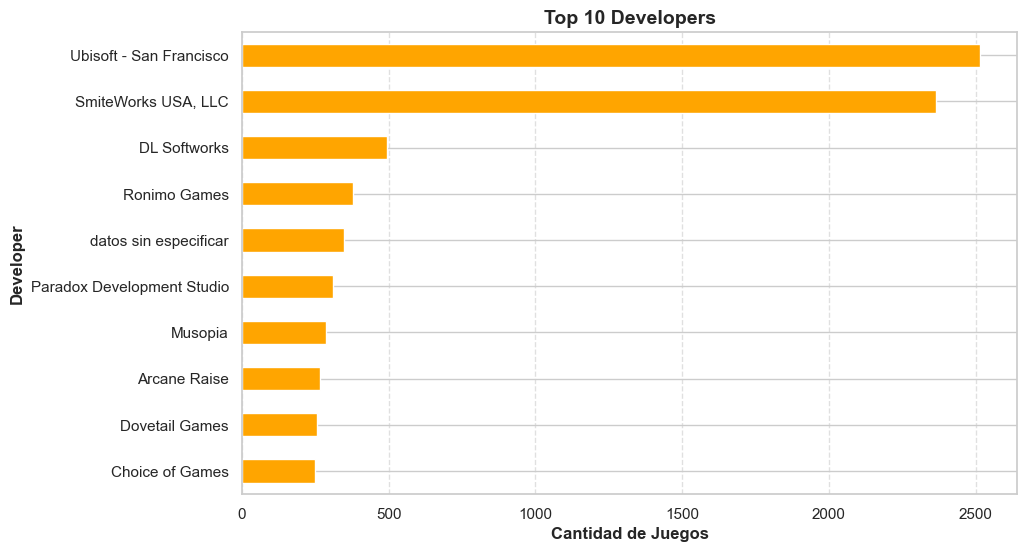

In [17]:
# Contamos la cantidad de juegos por developer
conteo_developer = df_steam_games['developer'].value_counts()

# Creamos una figura solo con un subplot para los developers
plt.figure(figsize=(10, 6))

# Plot para los developers
conteo_developer[:10].sort_values().plot(kind='barh', color='orange')  # Usar plot horizontal para facilitar la lectura
plt.title('Top 10 Developers', fontsize=14, weight='bold')
plt.xlabel('Cantidad de Juegos', weight='bold')
plt.ylabel('Developer', weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Agregar líneas de cuadrícula para referencia

# Mostramos el gráfico
plt.show()

**Conclusión:** Se puede observar que el mayor desarrollador de videojuegos en Steam es UBISOFT

**5. ¿Cual es rango promedio de los precios de videojuegos en Steam?**

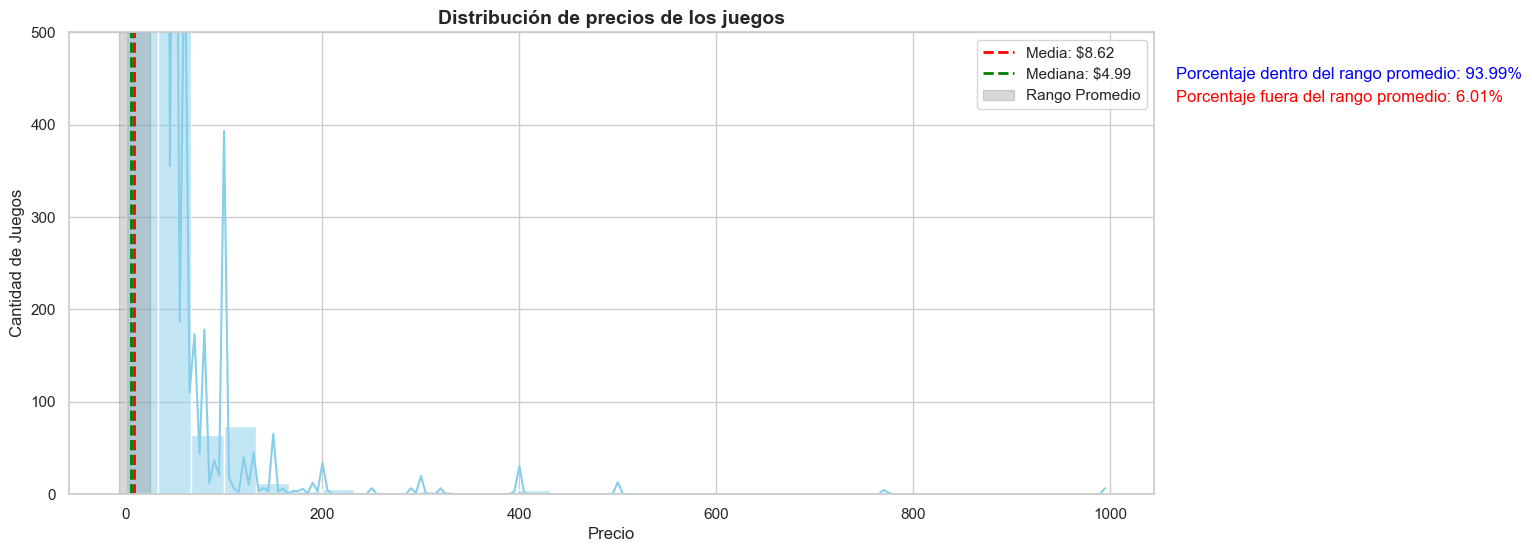

In [18]:
# Obtenemos los precios para cada juego y hacer un DataFrame
precio_unicos = df_steam_games.groupby('id')['price'].unique().reset_index().explode('price')
df_precio_unicos = precio_unicos['price']

# Calculamos media y mediana
media = df_precio_unicos.mean()
mediana = df_precio_unicos.median()

# Calculamos porcentajes dentro y fuera del rango promedio
porcentaje_dentro = (df_precio_unicos.between(media - df_precio_unicos.std(), media + df_precio_unicos.std())).sum() / len(df_precio_unicos) * 100
porcentaje_fuera = 100 - porcentaje_dentro

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(14, 6))

# Usamos un histograma para visualizar la distribución de precios
sns.histplot(df_precio_unicos, bins=30, color='skyblue', kde=True)

# Agregamos líneas indicadoras para la media y la mediana
ax.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: ${media:.2f}')
ax.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: ${mediana:.2f}')

# Agregamos áreas sombreadas para indicar el rango promedio
ax.axvspan(media - df_precio_unicos.std(), media + df_precio_unicos.std(), alpha=0.3, color='gray', label='Rango Promedio')

# Personalizamos el gráfico
ax.set_xlabel('Precio')
ax.set_ylabel('Cantidad de Juegos')
ax.set_title('Distribución de precios de los juegos', fontsize=14, weight='bold')
ax.legend()  # Mostrar leyenda

# Ajustamos el rango del eje y para enfocarse mejor en la distribución principal
ax.set_ylim(0, 500)

# Mostramos el porcentaje dentro y fuera del rango promedio
plt.text(1.02, 0.9, f'Porcentaje dentro del rango promedio: {porcentaje_dentro:.2f}%', transform=ax.transAxes, fontsize=12, color='blue')
plt.text(1.02, 0.85, f'Porcentaje fuera del rango promedio: {porcentaje_fuera:.2f}%', transform=ax.transAxes, fontsize=12, color='red')

# Mostramos el gráfico
plt.show()

**Conclusión:** Se puede ver que el 93.99 por ciento de datos se encuentran dentro del rango de 8.62 dolares, el otro 6.01 por ciento de datos estan fuera de ese rango, existiendo también datos de 255 dolares y otros juegos que tienen un costo atipico a la data.

**6. ¿Cuales son los géneros que tienen los juegos más caros?**

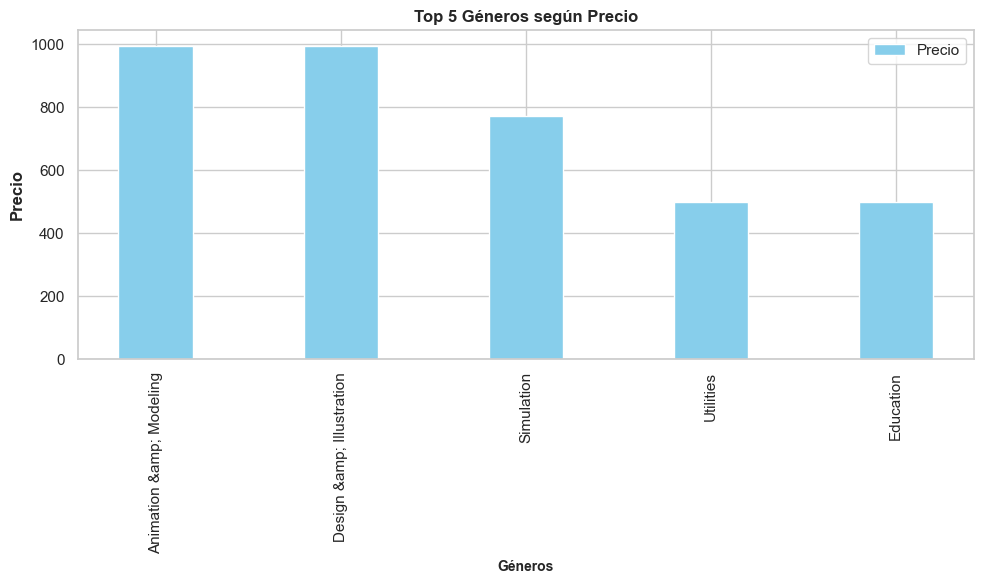

In [19]:
# Ordenamos el DataFrame por el precio en orden descendente
df_steam_games_orden = df_steam_games.sort_values(by='price', ascending=False)

# Tomamos los top 5 géneros
top_genres = df_steam_games_orden.head(5)

# Crear un gráfico de barras con barras más separadas
plt.figure(figsize=(10, 6))
bar_width = 0.4  # Ajusta el ancho de las barras según tus preferencias

# Utilizamos la función bar con un poco de espacio entre las barras
plt.bar(top_genres['genres'], top_genres['price'], width=bar_width, color='skyblue', label='Precio')

#Personalizamos el grafico
plt.xlabel('Géneros', weight = 'bold', fontsize = 10)
plt.ylabel('Precio', weight = 'bold')
plt.title('Top 5 Géneros según Precio', weight = 'bold')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()  # Ajusta automáticamente el diseño para evitar cortar etiquetas
plt.show()

**Conclusión:** Se puede ver que el género con los juegos más caros es Animation.

## 3.3. EDA - User_Reviews

**Variables:**

*   **user_id:** Variable de tipo categorica que contiene el id del usuario
*  **user_url:** Variable de tipo categorica que contiene la url del usuario
*   **item_id:** Variable de tipo categorica que contiene el id del juego
*   **recommend:** Variable de tipo categorica que contiene si el usuario recomienda el juego
*   **review:** Variable de tipo categorica que contiene el texto del review
*   **Posted Date:** Variable de tipo categorica que contiene la fecha de publicacion del review
*   **Date last edited:** Variable de tipo categorica que contiene la fecha de ultima edicion del review.
*   **funny review votes:** Variable de tipo categorica que contiene el numero de votos que consideran la review como divertida.
*   **helpful review votes:** Variable de tipo categorica que contiene el numero de votos que consideran la review como util.
*   **total review votes:** Variable de tipo categorica que contiene el numero de total de votos incluyen tanto como los que consideran utiles y cuales no.

A primera vista podemos trabajar en el EDA en 4 graficos:

*   relacion de los votos de helful y total reviews de los comentarios
*   tasa de recomendacion de los juegos.

**7. ¿Cual es el ratio de recomendacion de juegos según los reviews que dejan los jugadores?**

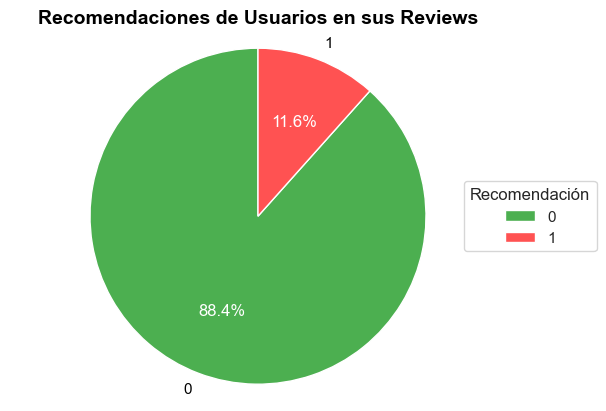

In [20]:
# Agrupamos los valores y ordenamos de menor a mayor
cant_recommend = df_user_reviews['recommend'].groupby(df_user_reviews['recommend']).count()
recommend = df_user_reviews['recommend'].unique()
colores = ["#4CAF50", "#FF5252"]  # Cambié los colores para mejorar el contraste
sorted_cant_recommend, sorted_recommend = zip(*sorted(zip(cant_recommend, recommend), reverse=True))

# Creamos el gráfico de pie
fig, piechart_3 = plt.subplots()
wedges, _, autopcts = piechart_3.pie(sorted_cant_recommend, labels=sorted_recommend, autopct='%1.1f%%', colors=colores, startangle=90, textprops={'color': 'black'}, pctdistance=0.6, labeldistance=1.1)

# Cambiamos el color del porcentaje para que sea más legible
for autopct in autopcts:
    autopct.set_color('white')

# Añadimos leyenda
piechart_3.legend(wedges, sorted_recommend, title="Recomendación", loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))

# Ajustamos el aspecto del gráfico, para que el gráfico de pie sea circular y no se deforme
piechart_3.axis('equal')

# Agregamos título
piechart_3.set_title('Recomendaciones de Usuarios en sus Reviews', color='black', fontsize=14, weight='bold')

# Mostramos el gráfico
plt.show()

**Conclusión:** Se puede observar que el mayor parte de las personas no recomiendan los juegos de Steam.

**8. ¿Cual es el ratio donde la valoración o recomendación es de ayuda para alguna estadistica?**

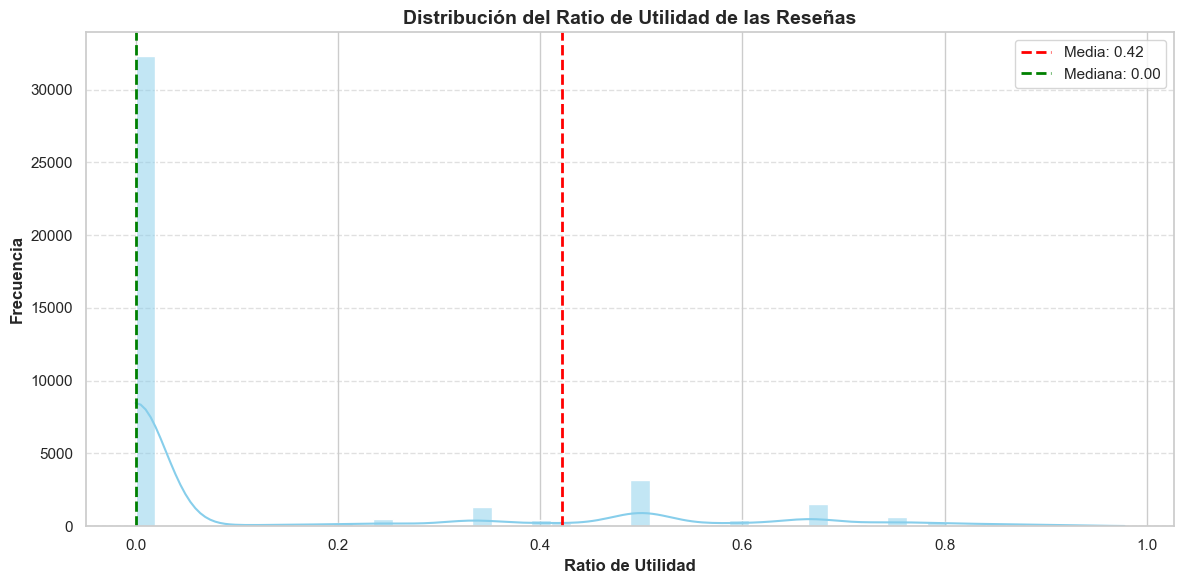

In [21]:
# Creamos la columna 'ratio' y llenar los valores nulos con 0
df_user_reviews['ratio'] = df_user_reviews['Helpful review votes'] / df_user_reviews['total review votes']
df_user_reviews['ratio'].fillna(0, inplace=True)

# Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.histplot(x='ratio', data=df_user_reviews[df_user_reviews['ratio'] < 1], bins=50, kde=True, color='skyblue')

# Añadimos líneas indicadoras para la media y la mediana
media = df_user_reviews['ratio'].mean()
mediana = df_user_reviews['ratio'].median()
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {mediana:.2f}')

# Personalizamos el gráfico
plt.xlabel('Ratio de Utilidad', weight='bold')
plt.ylabel('Frecuencia', weight='bold')
plt.title('Distribución del Ratio de Utilidad de las Reseñas', fontsize= 14 , weight='bold')
plt.legend()

# Ajustamos el diseño del gráfico
sns.set(style='whitegrid')  # Añadir una rejilla blanca de fondo
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Agregar líneas de cuadrícula en el eje y
plt.tight_layout()

# Mostramos el gráfico
plt.show()

**Conclusión:** Se puede observar que la columna de la data "helpful_review" no es de tanta ayuda para tomar un decisión o tiene poco aporte, se concluye que NO es de mucha ayuda debido a que la mediana se encuentra en 0.0.

## 3.4. EDA - User_Items

**Variables:**

*   **user_id**: Variable de tipo categorica que contiene el id del usuario.
*   **items_count**: Variable de tipo numerica que contiene el numero de juegos que posee el usuario.
*   **steam_appid**: Variable de tipo categorica que contiene el id del juego.
*   **user_url**: Variable de tipo categorica que contiene la url del usuario.
*   **item_id**: Variable de tipo categorica que contiene el id del juego.
*   **item_name**: Variable de tipo categorica que contiene el nombre del juego.
*   **playtime_forever**: Variable de tipo numerica que contiene las horas/minutos de juego desde su compra.
*   **playtime_2weeks**: Variable de tipo numerica que contiene las horas/minutos de juego las ultimas 2 semanas.
*   **item_name**: Variable de tipo categorica que contiene el nombre del juego
A primera vista podemos trabajar en el EDA en 4 graficos:
    *   Diagrama de barras Top 10 juego mas populares con mas tiempo de juego por siempre y por 2 semanas.
    *   Diagrama de barras de los 10 jugadores con mas tiempo de juego
  Juego que fue comprado mas veces.


















**9. ¿Cuales son los juegos más jugados en tiempo en Steam?**

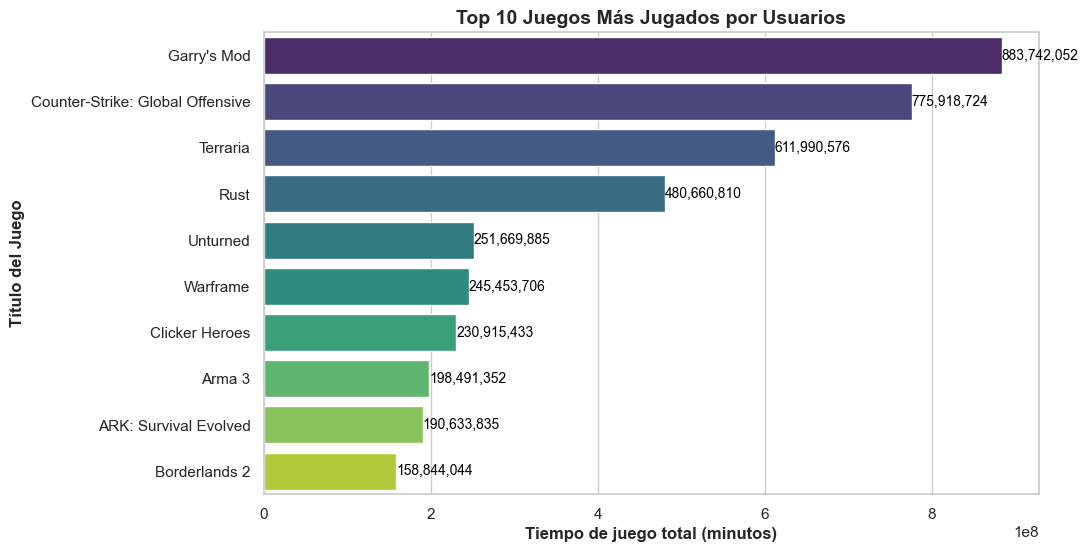

In [22]:
# Join the tables on 'id' and 'item_id'
merged_data = pd.merge(df_steam_games, df_user_items, left_on='id', right_on='item_id', how='inner')

# Configurar el estilo de seaborn
sns.set(style='whitegrid')

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='playtime_forever', y='app_name', data=merged_data.groupby('app_name')['playtime_forever'].sum().sort_values(ascending=False).head(10).reset_index(), palette='viridis')

# Añadir etiquetas de datos a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', fontsize=10, color='black')

# Personalizar el gráfico
ax.set_xlabel('Tiempo de juego total (minutos)', weight='bold')
ax.set_ylabel('Título del Juego', weight='bold')
ax.set_title('Top 10 Juegos Más Jugados por Usuarios', fontsize=14, weight='bold')

# Mostrar el gráfico
plt.show()

**Conclusión:** Se puede observar los juegos más jugados son:
                1.   Garry's Mod
                2.   Counter Strike
                3.   Terrania




**10. ¿Cuales son los juegos que siempre son jugados y los más jugados en las ultimas 2 semanas?**

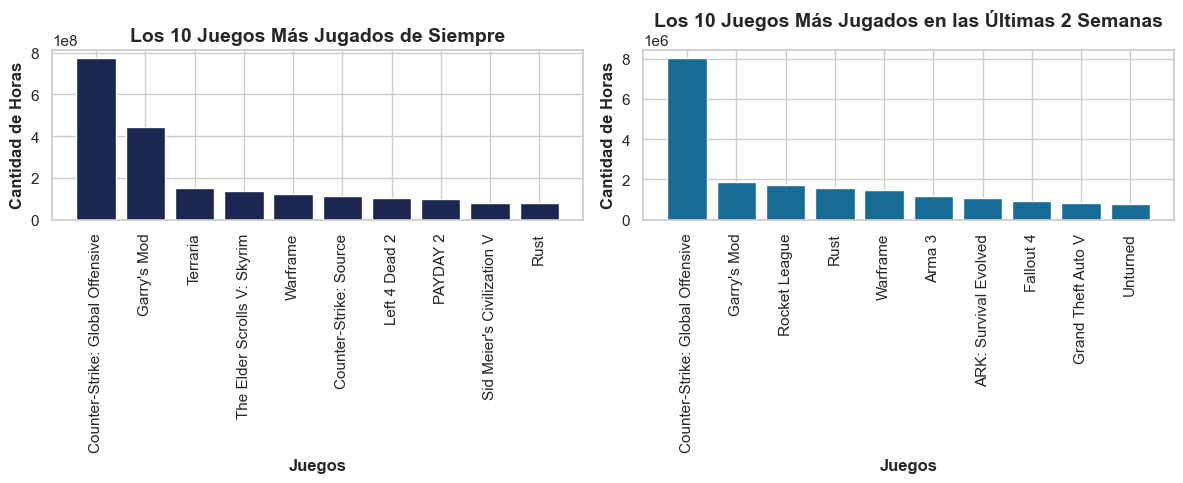

In [23]:
# Obtenemos los 10 juegos más jugados de siempre
mas_jugados_lifetime = df_user_items[['item_name', 'playtime_forever']].groupby(['item_name']).sum().sort_values(by='playtime_forever', ascending=False)[0:10]

# Obtenemos los 10 juegos más jugados en las últimas 2 semanas
mas_jugados_2weeks = df_user_items[['item_name', 'playtime_2weeks']].groupby(['item_name']).sum().sort_values(by='playtime_2weeks', ascending=False)[0:10]

# Creamos una figura y dos subplots en una sola fila
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráficamos de barras para los 10 juegos más jugados de siempre
ax1.bar(x=mas_jugados_lifetime.index, height=mas_jugados_lifetime['playtime_forever'], color='#1b2651')
ax1.set_xticks(mas_jugados_lifetime.index)
ax1.set_xticklabels(mas_jugados_lifetime.index, rotation= 'vertical')
ax1.set_xlabel('Juegos', weight = 'bold')
ax1.set_ylabel('Cantidad de Horas', weight = 'bold')
ax1.set_title('Los 10 Juegos Más Jugados de Siempre', weight = 'bold', fontsize=14)

# Gráficamos de barras para los 10 juegos más jugados en las últimas 2 semanas
ax2.bar(x=mas_jugados_2weeks.index, height=mas_jugados_2weeks['playtime_2weeks'], color='#166c96')
ax2.set_xticks(mas_jugados_2weeks.index)
ax2.set_xticklabels(mas_jugados_2weeks.index, rotation= 'vertical')
ax2.set_xlabel('Juegos', weight = 'bold')
ax2.set_ylabel('Cantidad de Horas', weight = 'bold')
ax2.set_title('Los 10 Juegos Más Jugados en las Últimas 2 Semanas', weight = 'bold', fontsize=14)

# Ajustamos el diseño y espacio entre subplots
plt.tight_layout()

# Mostramos el gráfico
plt.show()

**Conclusión:** Se puede observar que el juego más jugado a lo largo del rango de 1 y 2 semanas es Counter Strike.